### NEWS SENTIMENT ANALYSIS 

This is the seccond part of my capstone, I'll try to evaluate one of the top ten NEWS relate to the oil market.

1. I'll take the last 10 news of May (as a sample) 
2. Then i'll take the current last 10 post (as my experiment)
3. Build a sentiment analysis for both and try to analyses if they actually can predict the movement of the wti index oil price. 

Extra observation: 
1. I found a text database with the "Positive" and "Negative" words use it to review the stock market 
###### Please found it in my Database 

##### Warning: The evaluation bellow is a test of what I'll execute next.

Breaking news web page: http://oilprice.com/Latest-Energy-News/World-News/

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
from gensim import corpora, models, matutils
from collections import defaultdict
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
# By Tsvetana Paraskova - May 18 , 2017

news1 = ('While many oil producers part of the OPEC/non-OPEC agreement to curb production have already stated their support' 
'to the deal extension for another nine months, Kazakhstan is going into next week’s meeting with little enthusiasm' 
'for rolling over its production cuts, as it plans to raise output from its major oil fields.'
'Kazakhstan’s Energy Minister Kanat Bozumbaev said earlier this week that his country would attend the meeting at' 
'which OPEC and partners are expected to hammer out the details of the cuts extension. In the deal from November 30,'
'OPEC pledged to cut 1.2 million bpd of its production, while Azerbaijan, Bahrain, Brunei Darussalam, Equatorial Guinea,'
'Kazakhstan, Malaysia, Mexico, Oman, Russia, Republic of Sudan, and Republic of South Sudan committed to a collective' 
'cut of 558,000 bpd. At that time, Kazakhstan promised to cut output by 20,000 bpd from an average 1.5 million bpd,'
'Radio Free Europe says. According to Bloomberg, Minister Bozumbaev has said that his country won’t automatically roll' 
'over the cuts it is implementing now. Kazakhstan is seeking to increase production at its giant fields, especially' 
'Kashagan, which after years of delays and setbacks, resumed commercial-scale production in October 2016 at a rate of' 
'90,000 bpd. In January, the company operating the field said that it was ramping up production to 180,000 bpd.'
'Just days before Saudi Arabia and Russia said that they agreed that the production cuts should be extended by nine' 
'months to March 2018, Bozumbaev said that Kashagan currently produces 140,000-150,000 bpd, and output would rise' 
'to 200,000 bpd in the second half of the year, and possibly to 300,000 bpd at the end of the year.'
'Related: From Oil To Arms: Saudis Move Away From Crude'
'But the minister noted that it’s important for Kazakhstan that the price of Brent not drop below US$50 per barrel.' 
'The country’s budget is based on a US$50 Brent price, and therefore Kazakhstan will discuss the possibilities of an' 
'output cut extension. A recently approved expansion at another field, Tengiz, plans for production to increase by'
'some 260,000 bpd, to around 850,000 bpd. Given its ambitious plans to grow production, Kazakhstan may be reluctant' 
'to sign up to cutting its output for another nine months.')

In [3]:
#By Zainab Calcuttawala - May 18 , 2017
news2  =('Talks between Indonesia and the United Arab Emirates could bring the launch of a $5 billion energy project,' 
'according to news from a recent meeting between Indonesian President Joko Widodo and UAE Energy Minister Suhail' 
'Mohammed Faraj Al Mazrouei."We know that currently the world energy market is undergoing some transformation. Of' 
'course, changes have been made with sustainable and renewable energy," the president said at the Merdeka Palace in' 
'Jakarta on Thursday.Currently, the value of the UAE’s investments in Indonesia amounts to $2 billion, according to'
'Arcandra Tahar, deputy energy and mineral resources minister. The UAE officials recommended that Indonesia begin' 
'investment protection before sealing any bilateral international agreement. Al Mazrouei also requested tax incentives'
'that would prevent double taxation for the UAE’s investments in Indonesia. Masdar, a UAE-based clean energy company,'
'is also interested in working in the island nation. "We are also talking about Masdar, a company from the UAE, who' 
'wants to invest in renewable energy, including PLTS, solar power plants," Tahar confirmed, adding that the green' 
'company had been in talks with government-run electric firm PLN. "In addition, we also suggested that it would be good'
'if investment in Indonesia is made in cooperation with local companies, so that cooperation will be mutually beneficial."'
'Indonesia is currently producing some 800,000 barrels of crude daily – about half of what it consumes. That number' 
'is expected to soon surpass 1 million bpd, to reduce the country’s dependence on imports, which this month are' 
'estimated to have reached 8.4 million, through the $200 billion in oil investment the country plans to attract. Over' 
'the first quarter, Indonesia’s average monthly import rate was 10.55 million barrels.')

In [4]:
# Tsvetana Paraskova - May 22, 2017

news3= ('India wants better deals with OPEC, asking for “responsible price” and “seller-buyer alignment”, India’s Petroleum Minister Dharmenda Pradhan said on Twitter on Monday, following a meeting with OPEC’s Secretary General Mohammad Barkindo in Vienna.' 
'India raised the issue of “Asian Premium” still being charged by some OPEC members for supplies to India, Pradhan noted.'
'Ahead of the minister’s trip to Vienna, Times of India quoted an official as saying that “New Delhi is aiming to change the narrative from ‘Asian premium’ to ‘Asian discount”.'
'“It is seeking discount, longer credit period and priority loading, among other things. It is for Opec to decide whether it wants to retain its market share,” the official said, as quoted by Times of India, wielding its own clout and perhaps preying on OPEC’s perceived weakness ahead of the OPEC production cut meeting on May 25.'
'At the meeting with Barkindo at the OPEC-India Energy Dialogue, Pradhan underlined the importance of cooperation, since 86 percent of India’s crude oil imports come from the cartel, according to a press release by OPEC.'
'The Indian minister also tried to emphasize the message for better terms for its deals with OPEC in India’s expanding refining and petrochemicals sector.'
'Pradhan’s delegation consisted of all 7 refiners including IOCL, HPCL, BPCL, MRPL, Reliance, Essar, HMEL, the minister said on Twitter. India’s delegation included the CEOs of the seven public and private refiners who manage all 23 refineries in India currently processing around 4.7 million barrels a day, OPEC said in its statement.'
'“Both Parties underscored the importance of further expanding direct dialogue between Indian companies and their counterparts in OPEC Member Countries, particularly in the downstream, to help meet the ever-growing demand for oil in India,” OPEC said.'
'After the meeting, Pradhan said at a news conference that Saudi Aramco was “strongly interested” in a project with Indian state refining companies.'
'Last month, Indian media quoted Pradhan as saying that Aramco was in talks to buy a stake in a planned refinery expected to be built by state refiners on India’s west coast that would be the country’s biggest refinery.')      

In [5]:
#By Zainab Calcuttawala - May 22, 2017

news4 =('Even Libya and Nigeria could be asked to cut production at the Organization of Petroleum Exporting Countries’ (OPEC) meeting in Vienna on the 25th, when the bloc is expected to review the terms of the November agreement to cut production by 1.2 million barrels per day, according to the Iraqi oil minister.'
'When the nations last discussed the deal, Libyan output remained seriously curtailed due to several years of post-Gaddafi infighting, earning the North African country an exemption from the quotas that bound the rest of the block’s members.'
'Similarly, militant groups in the Niger Delta attacked Nigeria oil facilities to the point that production fell to roughly half of its former levels at times.'
'But both countries have recovered significantly from the chronic domestic strife. Libya’s newfound stability has allowed output to recently touch 800,000 barrels per day – compared to just 365,000 bpd in October. Nigerian production is also recovering from the attacks as Lagos’ officials meet with residents of the Niger Delta to discuss infrastructure improvement and revenue sharing opportunities.'
'These developments pushed Iraqi oil minister Jabar al-Luaibi to suggest at a press conference in Baghdad that the two African nations could also be expected to cut output as part of the deal’s extension, expected to last until March 2018. With Nigeria and Libya onboard, the cuts could be raised to 1.8 million bpd, the minister added.'
'But Nigeria still expects that its exemption will continue for at least six months, according to oil minister Ibe Kachikwu.'
'“The indications that I have so far is that there is a willingness to extending [the exemption],” he told reporters in Houston. “I expect we will get OPEC exemption but one year from now will it be renewed? I am not too sure.”'
'Libya also has plans to raise output to 1.32 million bpd by the end of the year, up from an earlier target of 1.1 million bpd.')

In [6]:
#By Tsvetana Paraskova - May 19, 2017

news5 = ('The oil and gas industry of Texas continued to recover in April, with strong oil production growth last month, the Federal Reserve Bank of Dallas said in its Energy Indicators monthly release.'
'The Permian Basin continued to be the driver of the U.S. rig count growth. Rig counts in the Permian increased from 310 in March to 337 in April, while rig counts in the Eagle Ford rose from 80 in March to 89 in April, the Dallas Fed said.'
'In job figures for a month lagging production figures, total Texas oil and gas employment rose in March by 3,500 jobs to around 211,700 jobs, with oil and gas extraction employment up slightly to 92,500 jobs, and payrolls in support activities for mining rising to 119,200. March was the third consecutive month of increases in total Texas oil and gas employment, the Dallas Fed said.'
'As early as in September last year, Fed economist Pia Orrenius said that encouraging employment growth in Texas suggests that “the worst of the energy crisis may be over”.'
'Earlier this month, the Dallas Fed said in its Texas Economic Update that positive job growth and rising rig counts indicate an ongoing energy sector recovery.')

In [7]:
#News Bloomberg Laura Hurst , Nayla Razzouk , and Grant Smith - 24 May 2017

news6=('OPEC and its allies were close to an agreement to extend their oil-production cuts for another nine months as they seek to prop up prices and revive their economies.'
'While ministers gathering in Vienna still planned to discuss other options -- a shorter deal for six months or curbs lasting for the whole of next year -- consensus was building around an agreement that runs through March 2018.'
'"At this moment, I think we have an agreement do nine months,” Algeria’s Energy Minister Noureddine Boutarfa told reporters in Vienna on Tuesday. “But tomorrow perhaps we’ll have another proposition.”'
'The Organization of Petroleum Exporting Countries and 11 non-members agreed last year to cut output by as much as 1.8 million barrels a day. The supply reductions were initially intended to last six months from January, but the slower-than-expected decline in surplus fuel inventories prompted the group to consider an extension. The most influential members of the deal, including Russia and Saudi Arabia and Iraq, have publicly backed supply curbs lasting until March 2018 to finally clear the glut.'
'“Not everybody” is on board yet for nine months, Kuwait’s Oil Minister Issam Almarzooq told reporters Tuesday, before leaving his country for Vienna. Kazakhstan and Iran are among the nations not to have expressed a view in public.'
'A committee of six OPEC and non-OPEC nations charged with ensuring successful implementation of the cuts will meet on Wednesday morning to study the merits of a 12-month extension, in addition to the six and nine-month durations already discussed publicly, according to delegates familiar with the matter. No participant in the agreement has publicly backed another 12 months.'
'Representatives of Kuwait and Oman said the group isn’t considering deeper cuts.'
'If OPEC maintains its April crude production of 31.8 million barrels a day throughout the rest of the year, the decline in oil stockpiles will accelerate, according to the International Energy Agency.'
'The deal “has been working and I know it will work even better for the second half," United Arab Emirates Energy Minister Suhail Al Mazrouei said on Tuesday on the sidelines of a conference in Abu Dhabi. “We need to give the market some more time.”')

In [8]:
#by Catherine Traywick  and Jennifer A Dlouhy, 23 May 2017

news7 = ('The White House plan to trim the national debt includes selling off half of the nation’s emergency oil stockpile and the entire backup gasoline supply, part of a broad series of changes proposed by President Donald Trump to the federal government’s role in energy markets.'
'Trump’s first complete budget proposal, released Tuesday, would raise $500 million in fiscal year 2018 -- and as much $16.6 billion over the next decade -- by drawing down the Strategic Petroleum Reserve.'
'“We think it’s a responsible thing to do," Mick Mulvaney, head of the White House Office of Management and Budget, told reporters. The “risk goes down dramatically when we have increased domestic production like we have today.”'
'The proposal also seeks to boost government revenues by allowing drilling in the Arctic National Wildlife Refuge, ending the practice of sharing oil royalties with states along the Gulf of Mexico and selling off government-owned electricity transmission lines in the West. Like much of the budget, those moves are likely to face opposition on Capitol Hill.'
'Presidential budget proposals typically undergo significant changes in Congress, but they provide insight into White House priorities.'
'The Strategic Petroleum Reserve currently holds 687.7 million barrels of oil in salt caverns and tanks at designated locations in Texas and Louisiana, which allow for quick distribution when natural disasters or unplanned incidents occur. The White House budget plan calls for selling 270 million barrels of reserve oil over the next decade beyond already planned sales, and it proposes closing two of the four Gulf Coast reserve sites. After all those sales, the reserve would be about 260 million barrels, it said.'
'The plan also seeks to close the Northeast Gasoline Supply Reserve, an emergency gasoline stockpile created in 2012 after Hurricane Sandy left some New York gas stations without fuel. It holds 1 million barrels of gasoline, all of which would be sold in fiscal year 2018 under the White House proposal.'
'Congressional Measures'
'Laws enacted in 2015 and 2016 call for the sale of nearly 190 million barrels of oil from the strategic petroleum reserve between 2017 and 2025 to raise money for unrelated government programs. Those sales would cut the reserve by about 27 percent. Slashing the stockpile in half beyond that would require legal changes, as the reserve must now contain a minimum of 450 million barrels.'
'Critics said the move risks undercutting an essential safeguard created after the 1973 oil embargo to help the U.S. weather supply shocks.'
'"The Strategic Petroleum Reserve is America’s only formal short-term line of defense against oil supply disruptions and price spikes," said Robbie Diamond, president of Securing America’s Future Energy, a group aiming to pare U.S. dependence on oil. "While we’ve been lulled into a false sense of complacency by the current period of relatively low oil prices, disruptions and volatility in the oil market are alive and well."'
'Oil, Gas Proposals'
'Trump is also seeking to raise money with two other proposed changes -- one that would be cheered by the oil industry and another that would draw its ire.'
'He projects raising $1.8 billion over the next decade by opening up the 19-million-acre Arctic National Wildlife Refuge to oil and gas development. The idea of allowing drilling in the refuge for its estimated 12 billion barrels of crude has long been championed by Alaska Republicans, including Senator Lisa Murkowski, who heads the appropriations subcommittee in charge of Interior spending.'
'But it’s anathema to environmentalists, who have successfully blocked ANWR drilling plans from advancing on Capitol Hill by stoking concerns about threats to the polar bears, caribou, wolves and other animals that live in the territory.'
'"For 30 years, Congress has voted nearly 50 times on whether or not to drill in the Arctic National Wildlife Refuge, yet our nation’s largest and wildest refuge remains protected today, thanks to the overwhelming support of the American people," said Kristen Miller, interim executive director of the Alaska Wilderness League.'
'Trump’s budget request suggests ANWR leasing could begin to pay off in fiscal 2022, with $100 billion in projected revenue that year. In addition to environmentalists’ opposition, it’s unclear how much appetite energy companies would have for the reserve. Monster discoveries there could yield decades of oil production, but the cost of operations in northern Alaska could discourage the activity amid modest crude prices and the domestic shale boom.'
'Trump’s budget request also revives an Obama-era proposal to cut the payments Gulf Coast states collect from offshore drilling near their coastlines, a change that would translate to an extra $3.56 billion in federal revenue over the next decade. Under a 2006 law, four Gulf states -- Alabama, Louisiana, Mississippi and Texas -- now claim 37.5 percent of the royalties that oil and gas companies send the federal government in exchange for drilling rights and production on some Gulf of Mexico leases.'
'Trump’s move echoes Obama’s attempt to divert some of those royalty payments. And his bid to quash state revenue sharing is likely to meet the same fierce resistance that Obama’s plans did. Just as they did under Obama, Gulf Coast lawmakers will fight to defend those payments, which help support restoration programs.'
'The budget also proposes restarting the Nuclear Waste Fund Fee in 2020, a sign that the administration is planning to have a permanent storage site for that waste up and running by that time -- presumably at a site in Nevada known as Yucca Mountain. That fee would raise nearly $3.1 billion over 10 years, it estimates.'
'The White House foresees $2.4 billion in additional revenue in 2019 from the sale of federally-owned transmission lines in the West. Those power lines mostly carry electricity from government-owned dams to metro areas.')

In [9]:
#by Javier Blas  and Jack Farchy, 21 May 2017

news8= ('Saudi Arabia and Russia are at odds on pretty much everything: the war in Syria, policies on Iran, ties with Washington. But when it comes to propping up global oil prices, they’ve never been more aligned.'
'Just look at how the world’s two biggest oil producers united last week to tell markets they want to maintain output curbs for an extra nine months. Coordinated leaks and official statements from Riyadh and Moscow -- circulated even before the Saudis sit down to agree the cuts with OPEC this Thursday -- sent oil rallying more than 5 percent within days.'
'“It’s a question of two countries which are acutely dependent on oil,” said Igor Yusufov, who served as Russia’s energy minister from 2001-2004, the last time the nations cooperated on energy policy.'
'It’s more a marriage of convenience -- Vladimir Putin has never been feted like Donald Trump in Saudi Arabia. But they share an interest in urgently stabilizing the price of the commodity on which their economies, and political legitimacy, rely. In the process, Russia and Saudi Arabia are shifting the balance of power that drives the global energy market following years of waning influence from the Organization of Petroleum Exporting Countries.'
'Whether their alliance is strong enough to survive the test of time or unravels quickly depends heavily on how effective the anticipated extension of production cuts until March 2018 is at shoring up prices. The stakes are particularly high for Saudi Arabia as the U.S., a long-time loyal customer, cements itself as a rival producer.'
'The duo have compelling domestic incentives to make things work. Putin is eager to spur the Russian economy, just emerging from a two-year recession, before he seeks re-election in March 2018. Saudi Prince Mohammed bin Salman, the royal responsible for engineering an unprecedented economic overhaul, needs a sturdier oil price to boost the valuation of Saudi Aramco ahead of an initial public offering later in the year.'
'Brent crude has risen from about $46 to $54 a barrel since the agreement to curb output by a total of 1.8 million barrels a day was first decided in the final weeks of last year. But it’s fallen 7 percent from a peak reached during the initial rush of enthusiasm, mostly because the global glut isn’t notably easing.'
'Shaky History'
'The relationship has already been fraught with friction. While Saudi Arabia quickly delivered a cut of 600,000 barrels a day, exceeding its pledge, Russia took almost four months before meeting its vow to cut half that amount. Riyadh has, at times, grown impatient with the pace of Moscow’s compliance, according to people familiar with the Saudi thinking.'
'If that sounds familiar it’s because the last time the Saudis and Russians were coordinating oil policy, a five-year stretch ending in 2004, their courtship eventually collapsed because Moscow failed to make good on the cuts it promised and Riyadh got frustrated.'
'That was before the U.S. shale oil industry shook the power balance in the global oil market and forced crude exporters worldwide to scramble to acclimatize. Since oil started crashing in mid-2014, they have confronted budget shortfalls that forced most to dip into oil savings and borrow money.'
'“The first driver is all about oil revenues,” said John Browne, the executive chairman of Russian billionaire Mikhail Fridman’s investment vehicle L1 Energy and former head of BP Plc. But there’s another motivation: leveraging “the geopolitical power of energy,” he said.'
'Oil-industry executives, analysts and energy officials monitoring both nations said beyond money, there are calculated political motives for ending a years-long rivalry over oil.'
'Diplomatic Tool'
'Riyadh, in particular, sees crude policy as a tool to influence Russian diplomacy in the Middle East, where the Saudis and the Russians are supporting opposing sides in the wars raging in Syria and Yemen. In a show of cooperation, Putin and Prince Mohammed held a face-to-face meeting on the sidelines of the G-20 in September in China.'
'Prince Mohammed told the Washington Post last month that the collaboration ultimately came down to Moscow’s camaraderie with Iran, a Saudi foe. “The main objective is not to have Russia place all its cards in the region behind Iran,” the 31-year-old said in that interview.'
'Moscow, meanwhile, is seeking a role in tumultuous Middle East for the first time since the Soviet Union collapsed in 1991, often clashing with the U.S.'
'For oil traders, the alliance has altered the playing field. After spending years hanging on every word of Middle Eastern oil officials on the sidelines of OPEC meetings in Viennese hotels, they’re now keeping closer watch of late-night comments out of the Kremlin.'
'The U-turn in relations comes after a decade of antagonism over energy policy, with Russia notably refusing to work with the Saudis to stabilize prices in 2008, when the price of a barrel of crude slid by more than $100 in five months.'
'Shifting Stakes'
'As recently as a meeting in Vienna in November 2014, then Saudi Oil Minister Ali Al-Naimi and Igor Sechin, a Putin ally who runs state-controlled oil giant Rosneft PJSC, clashed over how to manage oil production. Sechin had ruled out curbs, saying Russian companies would struggle to reduce output during the cold Siberian winter. Naimi didn’t hide his anger.'
'“It looks like nobody can cut, so I think the meeting is over,” he said, according to his memoirs.'
'The latest alliance has new faces: Russian energy minister Alexander Novak and Khalid Al-Falih, who succeeded Naimi after he retired in May 2016. About six months later, the two were key in getting about two dozen countries to trim production. They talk on the phone often and have held several joint press conferences. A number of times, including this month, they’ve coordinated statements and leaks to talk up oil prices.'
'But the relationship could break down as quickly as it was forged. Shale production is surging so fast that America’s crude output is projected to reach records exceeding 10 million barrels a day next year, according to the Energy Information Administration. That’s more than Saudi Arabia is pumping at the moment.'
'The trend won’t do much to inspire Russian-Saudi symbiosis. In recent days, Sechin called on the Russian government to draw up a plan for an orderly exit from the cuts and pledged to be “ready for a competitive battle.” Rosneft had already warned in March of the “risk of a resumption in the price war.”'
'If U.S. producers can’t be persuaded to limit supply alongside the Saudis and Russians, the resulting battle for market share could “destroy the market,” Yusufov, the former Russian minister, warned.')

In [10]:
#by Kadhim Ajrash  and Khalid Al Ansary, 23 May 2017
news9= ('Iraq backed a proposal from Saudi Arabia and Russia to extend output cuts for nine months, removing one of the last remaining obstacles to an agreement at the OPEC meeting in Vienna this week.'
'OPEC’s second-largest producer, which only reluctantly agreed last year to cut output, had previously favored prolonging the historic deal by just six months. Saudi Minister of Energy and Industry Khalid Al-Falih secured the backing after talks in Baghdad with his Iraqi counterpart Jabbar Al-Luaibi. Non-OPEC nations Oman and Mexico also confirmed their support for a nine-month extension.'
'“The trend now regarding the output deal is to extend for nine months,” Al-Falih told reporters in the Iraqi capital on Monday. “All I talked to from inside OPEC are supporting the nine months of cuts,” although the final decision won’t be made until the group’s meeting on May 25, he said.'
'The Organization of Petroleum Exporting Countries and 11 non-members agreed last year to cut output by as much as 1.8 million barrels a day. The supply reductions were initially intended to last six months from January, but the slower-than-expected decline in surplus fuel inventories prompted the group to consider an extension. Data from the U.S. Energy Information Administration indicate that maintaining the curbs into the first quarter of 2018 would bring stockpiles back in line with the five-year average -- OPEC’s stated goal.'
'Ecuador, an OPEC member who’s incoming president will be sworn in on May 24, will support the production cuts to be discussed in Vienna the next day, the country’s oil ministry said in an email Monday, without specifying a time frame. Futures in New York fell 0.4 percent to $50.94 a barrel at 12:24 p.m. Singapore time, while Brent crude traded at $53.65 a barrel.'
'Iraq has the worst record of compliance with its pledged cuts, pumping about 80,000 more barrels of oil a day than permitted during the first quarter. If that deal gets extended to 2018, the nation will have even less incentive to comply because capacity at key southern fields is expanding and three years of fighting Islamic State has left it drowning in debt.'
'Additional countries may join the supply cuts, but the overall agreement won’t be substantially changed, Al-Falih said.'
'“There is an initial willingness for one or two countries from the small producers to join,” he said. “Slight changes might happen but deal in its general shape will be almost the same we agreed upon last December.”')

In [11]:
#By Zainab Calcuttawala - May 23, 2017
news10= ('If the OPEC meeting in Vienna fails to shock oil prices upwards, Deutsche Bank analysts would “feel inclined to downgrade” the investment attractiveness of oil sector stocks to Neutral, according to a new note by Mark Roberts, the German bank’s chief of research and strategy for alternatives.'
'“OPEC might agree to expand the cut, which would be taken positively by investors,” Roberts said. “Energy equities have not been able to decouple from volatile oil-price movements. The market does not give credit to the fundamental improvements of the companies’ cash flows.”'
'Despite traditionally high dividends for oil sector investors, current markets require shareholders to review corporate financial records to determine if a company has the resources for payouts, according to Marco Scherer of Deutsche Asset Management.'
'“Many integrated oil companies are making progress on this front, but only a fraction has achieved satisfactory dividend coverage just yet,” he said. “We are even more selective when it comes to U.S. E&P companies, as they are more prone to oil-price changes and changing financing conditions.”'
'Superbly productive oilfields are a major pre-requisite for investments in the upstream U.S. oil sector, Scheder added. The consolidation of oilfield services providers has led to the emergence of several well-diversified multinational OFS companies that will be more resilient to oil price changes in the future, he noted.'
'As drilling activity dried up following the oil price crash of 2014, OFS companies had no choice but to slash their prices, charging much less for rigs, equipment, and services.'
'Now, drilling in the U.S. is coming back quickly, shifting leverage back in favor of OFS companies, who are starting to hike their prices. According to S&P Global Platts, services costs are expected to rise by about 20 percent on average this year. That could offset some of the efficiency gains that shale drillers are accruing as they improve their drilling techniques.')

In [12]:
df = pd.DataFrame({
    'Date':
        ['2017-05-18','2017-05-18','2017-05-22','2017-05-22','2018-05-19','2017-05-24','2017-05-23','2017-05-21','2017-05-23','2017-05-23'],
    'News':[news1, news2 , news3 ,  news4 , news5 , news6 , news7,  news8, news9, news10], 'Autor':['Tsvetana Paraskova', 'Zainab Calcuttawala' , 'Tsvetana Paraskova' ,  'Zainab Calcuttawala' , 'Tsvetana Paraskova' , 'Laura Hurst , Nayla Razzouk , and Grant Smith' , 'Catherine Traywick  and Jennifer A Dlouhy',  'Javier Blas  and Jack Farchy', 'Kadhim Ajrash  and Khalid Al Ansary', 'Zainab Calcuttawala']})

In [13]:
documents = [news1, news2 , news3 ,  news4 , news5 , news6 , news7,  news8, news9, news10]

In [14]:
dfn= df[['Date', 'Autor', 'News']]

In [15]:
dfn.head(20)

,Date,Autor,News
0,2017-05-18,Tsvetana Paraskova,While many oil producers part of the OPEC/non-...
1,2017-05-18,Zainab Calcuttawala,Talks between Indonesia and the United Arab Em...
2,2017-05-22,Tsvetana Paraskova,"India wants better deals with OPEC, asking for..."
3,2017-05-22,Zainab Calcuttawala,Even Libya and Nigeria could be asked to cut p...
4,2018-05-19,Tsvetana Paraskova,The oil and gas industry of Texas continued to...
5,2017-05-24,"Laura Hurst , Nayla Razzouk , and Grant Smith",OPEC and its allies were close to an agreement...
6,2017-05-23,Catherine Traywick and Jennifer A Dlouhy,The White House plan to trim the national debt...
7,2017-05-21,Javier Blas and Jack Farchy,Saudi Arabia and Russia are at odds on pretty ...
8,2017-05-23,Kadhim Ajrash and Khalid Al Ansary,Iraq backed a proposal from Saudi Arabia and R...
9,2017-05-23,Zainab Calcuttawala,If the OPEC meeting in Vienna fails to shock o...


In [137]:
# For Research purpose: 
dfn.to_csv('News.csv')

In [70]:
#Seccond Data Set:
positive = '/Users/EddieArenas/desktop/Capstone/positive-words.txt'
positive = pd.read_table('/Users/EddieArenas/desktop/Capstone/positive-words.txt')

In [77]:
positive.head()

,Words
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [78]:
positive['Positive'] = 'positive'

In [80]:
positive.head()

,Words,Positive
0,abound,positive
1,abounds,positive
2,abundance,positive
3,abundant,positive
4,accessable,positive


In [18]:
#Third Data Set:
negative = '/Users/EddieArenas/desktop/Capstone/negative-words.txt'
negative = pd.read_table(negative, encoding = "ISO-8859-1")

In [19]:
negative.head()

,Words
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [81]:
negative['Negative'] = 'negative'

In [82]:
negative.head()

,Words,Negative
0,2-faced,negative
1,2-faces,negative
2,abnormal,negative
3,abolish,negative
4,abominable,negative


In [98]:
dfn.News.iloc[0] 

'While many oil producers part of the OPEC/non-OPEC agreement to curb production have already stated their supportto the deal extension for another nine months, Kazakhstan is going into next week’s meeting with little enthusiasmfor rolling over its production cuts, as it plans to raise output from its major oil fields.Kazakhstan’s Energy Minister Kanat Bozumbaev said earlier this week that his country would attend the meeting atwhich OPEC and partners are expected to hammer out the details of the cuts extension. In the deal from November 30,OPEC pledged to cut 1.2 million bpd of its production, while Azerbaijan, Bahrain, Brunei Darussalam, Equatorial Guinea,Kazakhstan, Malaysia, Mexico, Oman, Russia, Republic of Sudan, and Republic of South Sudan committed to a collectivecut of 558,000 bpd. At that time, Kazakhstan promised to cut output by 20,000 bpd from an average 1.5 million bpd,Radio Free Europe says. According to Bloomberg, Minister Bozumbaev has said that his country won’t autom

In [115]:
import re
s = dfn.News.iloc[0] 
wordList = re.sub("[^\w]", " ",  s).split()

In [117]:
#wordList

In [21]:
dfn['vader_neg'] = 0
dfn['vader_pos'] = 0
dfn['vader_neu'] = 0
dfn['vader_compound'] = 0

for i, q in enumerate(dfn.News.values):
    vs = analyzer.polarity_scores(q)
    dfn.iloc[i, -4] = vs['neg']
    dfn.iloc[i, -3] = vs['pos']
    dfn.iloc[i, -2] = vs['neu']
    dfn.iloc[i, -1] = vs['compound']

/Users/EddieArenas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/EddieArenas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/EddieArenas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [22]:
dfn.head(10)

,Date,Autor,News,vader_neg,vader_pos,vader_neu,vader_compound
0,2017-05-18,Tsvetana Paraskova,While many oil producers part of the OPEC/non-...,0.045,0.079,0.876,0.9155
1,2017-05-18,Zainab Calcuttawala,Talks between Indonesia and the United Arab Em...,0.013,0.120,0.867,0.9702
2,2017-05-22,Tsvetana Paraskova,"India wants better deals with OPEC, asking for...",0.041,0.059,0.900,0.7506
3,2017-05-22,Zainab Calcuttawala,Even Libya and Nigeria could be asked to cut p...,0.037,0.024,0.939,-0.2500
4,2018-05-19,Tsvetana Paraskova,The oil and gas industry of Texas continued to...,0.073,0.142,0.785,0.9382
5,2017-05-24,"Laura Hurst , Nayla Razzouk , and Grant Smith",OPEC and its allies were close to an agreement...,0.041,0.127,0.832,0.9795
6,2017-05-23,Catherine Traywick and Jennifer A Dlouhy,The White House plan to trim the national debt...,0.065,0.084,0.851,0.9178
7,2017-05-21,Javier Blas and Jack Farchy,Saudi Arabia and Russia are at odds on pretty ...,0.080,0.075,0.845,-0.8865
8,2017-05-23,Kadhim Ajrash and Khalid Al Ansary,Iraq backed a proposal from Saudi Arabia and R...,0.069,0.091,0.840,0.3314
9,2017-05-23,Zainab Calcuttawala,If the OPEC meeting in Vienna fails to shock o...,0.048,0.091,0.861,0.9179


### NLTK 

In [28]:
from nltk.corpus import stopwords

nltk_stops = stopwords.words()

In [29]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)

In [32]:
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(dfn['News'])

In [33]:
vectorizer.vocabulary_

{'oil': 824,
 'producers': 919,
 'opec': 831,
 'non': 796,
 'agreement': 87,
 'curb': 305,
 'production': 922,
 'stated': 1157,
 'supportto': 1192,
 'deal': 321,
 'extension': 465,
 'months': 763,
 'kazakhstan': 652,
 'going': 537,
 'week': 1297,
 'meeting': 729,
 'little': 692,
 'enthusiasmfor': 432,
 'rolling': 1047,
 'cuts': 312,
 'plans': 878,
 'raise': 959,
 'output': 842,
 'major': 711,
 'fields': 490,
 'energy': 428,
 'minister': 749,
 'kanat': 650,
 'bozumbaev': 182,
 'said': 1064,
 'earlier': 399,
 'country': 293,
 'attend': 140,
 'atwhich': 143,
 'partners': 855,
 'expected': 457,
 'hammer': 552,
 'details': 349,
 'november': 805,
 '30': 38,
 'pledged': 884,
 'cut': 311,
 'million': 745,
 'bpd': 185,
 'azerbaijan': 147,
 'bahrain': 152,
 'brunei': 191,
 'darussalam': 317,
 'equatorial': 435,
 'guinea': 549,
 'malaysia': 714,
 'mexico': 738,
 'oman': 828,
 'russia': 1060,
 'republic': 1006,
 'sudan': 1181,
 'south': 1141,
 'committed': 250,
 'collectivecut': 244,
 '558': 53,
 

In [34]:
vectorizer.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '119',
 '12',
 '140',
 '150',
 '16',
 '180',
 '19',
 '190',
 '1973',
 '1991',
 '20',
 '200',
 '2001',
 '2004',
 '2006',
 '2008',
 '2012',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2022',
 '2025',
 '211',
 '23',
 '24',
 '25',
 '25th',
 '260',
 '27',
 '270',
 '30',
 '300',
 '31',
 '310',
 '32',
 '337',
 '365',
 '37',
 '450',
 '46',
 '50',
 '500',
 '53',
 '54',
 '55',
 '558',
 '56',
 '600',
 '65',
 '687',
 '700',
 '80',
 '800',
 '850',
 '86',
 '89',
 '92',
 '94',
 'able',
 'abu',
 'accelerate',
 'acclimatize',
 'according',
 'accruing',
 'achieved',
 'acre',
 'activities',
 'activity',
 'acutely',
 'added',
 'adding',
 'addition',
 'additional',
 'administration',
 'advancing',
 'african',
 'agency',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aiming',
 'al',
 'alabama',
 'alaska',
 'alexander',
 'algeria',
 'ali',
 'aligned',
 'alignment',
 'alive',
 'alliance',
 'allies',
 'allow',
 'allowed',
 'allowing',
 'ally',
 'almarzooq',
 

In [35]:
docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
docs.sum()

000            15
10              3
100             2
11              2
119             1
12              4
140             1
150             1
16              1
180             1
19              1
190             1
1973            1
1991            1
20              3
200             3
2001            1
2004            2
2006            1
2008            1
2012            1
2014            3
2015            1
2016            3
2017            1
2018           10
2019            1
2020            1
2022            1
2025            1
               ..
weakness        1
weather         1
wednesday       1
week            4
weeks           1
west            3
white           6
whowants        1
widodo          1
wielding        1
wilderness      1
wildest         1
wildlife        3
willingness     2
winter          1
wolves          1
won             4
word            1
work            3
working         2
world           2
worldwide       1
worst           2
year           21
years     

In [36]:
# This is the fastest way to swap a dictionary key / value order.  
# This is the format gensim LDA expects it's vocabulary.
vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocab

{824: 'oil',
 919: 'producers',
 831: 'opec',
 796: 'non',
 87: 'agreement',
 305: 'curb',
 922: 'production',
 1157: 'stated',
 1192: 'supportto',
 321: 'deal',
 465: 'extension',
 763: 'months',
 652: 'kazakhstan',
 537: 'going',
 1297: 'week',
 729: 'meeting',
 692: 'little',
 432: 'enthusiasmfor',
 1047: 'rolling',
 312: 'cuts',
 878: 'plans',
 959: 'raise',
 842: 'output',
 711: 'major',
 490: 'fields',
 428: 'energy',
 749: 'minister',
 650: 'kanat',
 182: 'bozumbaev',
 1064: 'said',
 399: 'earlier',
 293: 'country',
 140: 'attend',
 143: 'atwhich',
 855: 'partners',
 457: 'expected',
 552: 'hammer',
 349: 'details',
 805: 'november',
 38: '30',
 884: 'pledged',
 311: 'cut',
 745: 'million',
 185: 'bpd',
 147: 'azerbaijan',
 152: 'bahrain',
 191: 'brunei',
 317: 'darussalam',
 435: 'equatorial',
 549: 'guinea',
 714: 'malaysia',
 738: 'mexico',
 828: 'oman',
 1060: 'russia',
 1006: 'republic',
 1181: 'sudan',
 1141: 'south',
 250: 'committed',
 244: 'collectivecut',
 53: '558',
 

In [37]:
frequency = defaultdict(int)

for text in documents:
    for token in text.split():
        frequency[token] += 1
        
frequency

defaultdict(int,
            {'While': 2,
             'many': 1,
             'oil': 52,
             'producers': 4,
             'part': 3,
             'of': 127,
             'the': 256,
             'OPEC/non-OPEC': 1,
             'agreement': 9,
             'to': 160,
             'curb': 2,
             'production': 20,
             'have': 20,
             'already': 5,
             'stated': 2,
             'their': 12,
             'supportto': 1,
             'deal': 8,
             'extension': 2,
             'for': 45,
             'another': 8,
             'nine': 9,
             'months,': 4,
             'Kazakhstan': 7,
             'is': 33,
             'going': 1,
             'into': 5,
             'next': 8,
             'week’s': 1,
             'meeting': 14,
             'with': 29,
             'little': 1,
             'enthusiasmfor': 1,
             'rolling': 1,
             'over': 9,
             'its': 23,
             'cuts,': 3,
             'a

In [38]:
texts = [[token for token in text.split() if frequency[token] > 1 and token not in nltk_stops]
          for text in documents]

texts

[['While',
  'oil',
  'producers',
  'part',
  'agreement',
  'curb',
  'production',
  'already',
  'stated',
  'deal',
  'extension',
  'another',
  'nine',
  'months,',
  'Kazakhstan',
  'next',
  'meeting',
  'production',
  'cuts,',
  'plans',
  'raise',
  'output',
  'major',
  'oil',
  'Energy',
  'Minister',
  'Bozumbaev',
  'said',
  'earlier',
  'week',
  'country',
  'would',
  'meeting',
  'OPEC',
  'expected',
  'cuts',
  'extension.',
  'In',
  'deal',
  'November',
  'pledged',
  'cut',
  '1.2',
  'million',
  'bpd',
  'production,',
  'Republic',
  'Republic',
  'bpd.',
  'time,',
  'Kazakhstan',
  'promised',
  'cut',
  'output',
  'bpd',
  'average',
  'million',
  'According',
  'Minister',
  'Bozumbaev',
  'said',
  'country',
  'won’t',
  'cuts',
  'Kazakhstan',
  'seeking',
  'increase',
  'production',
  'giant',
  'years',
  'production',
  '2016',
  'rate',
  'bpd.',
  'In',
  'January,',
  'company',
  'said',
  'production',
  'Saudi',
  'Arabia',
  'Russia',

In [39]:
# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)
dictionary

In [40]:
# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 7),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 3),
  (12, 2),
  (13, 1),
  (14, 6),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 3),
  (19, 1),
  (20, 4),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 3),
  (25, 5),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 3),
  (33, 2),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 2),
  (40, 4),
  (41, 2),
  (42, 2),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [(1, 1),
  (16, 1),
  (18, 1),
  (22, 1),
  (23, 1),
  (25, 1)

In [47]:
lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    num_topics  =  3,
    passes      =  50,
    id2word     =  vocab
)

In [48]:
lda.print_topics(num_topics=3, num_words=20)

[(0,
  '0.016*"oil" + 0.013*"opec" + 0.010*"said" + 0.009*"saudi" + 0.008*"minister" + 0.008*"india" + 0.007*"output" + 0.007*"energy" + 0.007*"meeting" + 0.007*"year" + 0.006*"cuts" + 0.006*"months" + 0.006*"production" + 0.006*"cut" + 0.006*"countries" + 0.006*"day" + 0.005*"russian" + 0.005*"barrels" + 0.005*"million" + 0.004*"arabia"'),
 (1,
  '0.013*"energy" + 0.009*"indonesia" + 0.008*"months" + 0.008*"uae" + 0.007*"agreement" + 0.007*"minister" + 0.007*"million" + 0.005*"according" + 0.005*"barrels" + 0.005*"opec" + 0.005*"oil" + 0.004*"country" + 0.004*"currently" + 0.004*"vienna" + 0.004*"deal" + 0.004*"month" + 0.004*"tuesday" + 0.004*"cuts" + 0.004*"al" + 0.004*"mazrouei"'),
 (2,
  '0.021*"oil" + 0.011*"said" + 0.009*"production" + 0.008*"reserve" + 0.007*"bpd" + 0.007*"000" + 0.007*"million" + 0.006*"budget" + 0.005*"companies" + 0.005*"kazakhstan" + 0.005*"drilling" + 0.005*"gas" + 0.005*"energy" + 0.005*"barrels" + 0.005*"billion" + 0.005*"texas" + 0.005*"price" + 0.005*"

In [43]:
lda.get_document_topics(dictionary.doc2bow(texts[3]))

[(0, 0.28702711356320826), (1, 0.48678761797664966), (2, 0.22618526846014222)]

In [49]:
topics_labels = {
   0: "Bullish",
   1: "Neutral",
   2: "Bearish" 
}

In [50]:
doc_topics = [lda.get_document_topics(doc) for doc in corpus]

topic_data = []

for document_id, topics in enumerate(doc_topics):
    
    document_topics = []
    
    for topic, probability in topics:
       
        topic_data.append({
            'document_id':  document_id,
            'topic_id':     topic,
            'topic':        topics_labels[topic],
            'probability':  probability
        })

topics_df = pd.DataFrame(topic_data)
topics_df.pivot_table(values="probability", index=["document_id", "topic"]).T

document_id         0                             1                      \
topic         Bearish   Bullish   Neutral   Bearish   Bullish   Neutral   
probability  0.659944  0.289892  0.050164  0.511903  0.365904  0.122193   

document_id         2                             3    ...            6  \
topic         Bearish   Bullish   Neutral   Bearish    ...      Neutral   
probability  0.515245  0.372321  0.112434  0.518091    ...     0.105097   

document_id         7                             8                     \
topic         Bearish   Bullish   Neutral   Bearish   Bullish  Neutral   
probability  0.594113  0.321333  0.084554  0.524772  0.378279  0.09695   

document_id         9                      
topic         Bearish   Bullish   Neutral  
probability  0.489989  0.475262  0.034749  

[1 rows x 30 columns]

In [39]:
%matplotlib inline

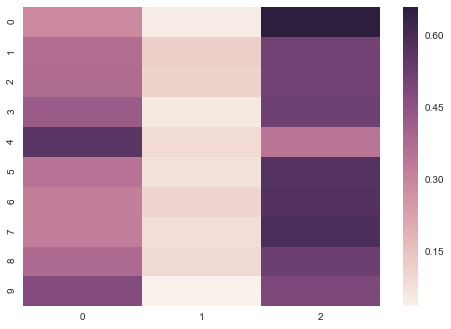

In [51]:
import seaborn as sns

doc_topics = [lda.get_document_topics(doc) for doc in corpus]

doc_topic_probabilities = []

for document in doc_topics:
    
    single_document = []
    
    for topic, probablity in document:
        
        single_document.append(probablity)
        
    doc_topic_probabilities.append(single_document)
    
docs_topics = pd.DataFrame(doc_topic_probabilities)
sns.heatmap(docs_topics)

## FURTHER STUDIES NEXT: 